PT

O Walmart é uma rede de hipermercados muito famosa por estar presente em 27 países diferentes, com mais de 11 mil lojas. Deixou de atuar no Brasil em 2019 mas, continua atuando fortemente em outros países. Nesse estudo, o Walmart traz uma combinação de dados de 45 lojas incluindo informações de vendas mensais. O Walmart tenta encontrar o impacto de feriados nas vendas das lojas. Os feriados  incluídos nos dados são: Natal, Ação de Graças, Super Bowl, e dia do Trabalho. 

O objetivo desta análise é predizer as vendas das lojas de uma semana. Como há datas, vou analisar se as vendas são impactadas por fatores baseados no tempo. E a pergunta que norteia esse estudo será: como a inclusão de feriados em uma semana aumenta as vendas nas lojas? 

EN

Walmart is a well-known hypermarket chain present in 27 different countries, with over 11,000 stores. It ceased operations in Brazil in 2019 but continues to operate strongly in other countries. In this study, Walmart brings together data from 45 stores, including monthly sales information. Walmart seeks to identify the impact of holidays on store sales. The holidays included in the data are: Christmas, Thanksgiving, Super Bowl, and Labor Day.

The objective of this analysis is to predict store sales for a week. Since there are dates involved, I will analyze whether sales are affected by time-based factors. The guiding question for this study will be: how does the inclusion of holidays in a week increase store sales?

### Importando bibliotecas e dados

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

# Date-time
import math
from datetime import datetime
from datetime import timedelta

# Plotagem/Plotting
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing


import warnings
warnings.filterwarnings("ignore")

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Lendo os arquivos e armazenando em dataframes
#### Reading files and storing in dataframes

In [3]:
df_store = pd.read_csv('./Data/stores.csv')

In [4]:
df_train = pd.read_csv('./Data/train.csv')

In [5]:
df_features = pd.read_csv('./Data/features.csv')

In [6]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
# Concatenando os 3 diferentes datasets
# Merge 3 different sets
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [10]:
# Removendo coluna duplicada: o uso de inplace significa que estamos sobrescrevendo o dataframe
# Removing duplicated column: Use of inplace means we're overwriting the dataframe
df.drop(['IsHoliday_y'], axis = 1, inplace=True)

In [11]:
#Renomeando a coluna
#Renaming the column
df.rename(columns={'IsHoliday_x':'IsHoliday'}, inplace = True)

In [12]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [13]:
#Verifying if dataframe is not corrupted after changes made.
# This function shows (rows,columns)
df.shape 

(421570, 16)

### Lojas e Números de Departamentos
#### Store & Department numbers

In [14]:
# Número de valores distintos
# Number of different values
df['Store'].nunique()

45

In [15]:
df['Dept'].nunique()

81

PT
Agora, eu verifico as médias de vendas semanais para cada loja e departamento a fim de observar valores divergentes para o cenário. 

EN
Now, I check the weekly sales averages for each store and department to observe divergent values for the scenario.

In [16]:
store_dept_table = pd.pivot_table(df,index='Store', columns='Dept', values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


In [17]:
output = df['Dept'].unique()
print(sorted(output))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


PT
O número das lojas vão de 1 até 45, enquanto o número dos departamentos vão de 1 a 99, mas é possível notar que há alguns valores faltantes como 86, 88, e 89. O número total de departamentos deve ser, portanto, 81.

É possível ver, a partir da tabela pivot, que há médias zeradas e médias negativas. Nesse cenário,é impossível que uma loja/departamento não venda absolutamente nada em uma semana. Os valores 0 e valores negativos não podem aparecer. Logo, será necessário alterar tais valores.

EN
The number of stores ranges from 1 to 45, while the number of departments ranges from 1 to 99, but it is possible to notice that there are some missing values such as 86, 88, and 89. The total number of departments must therefore be 81.

It is possible to see, from the pivot table, that there are zero averages and negative averages. In this scenario, it is impossible for a store/department to sell absolutely nothing in a week. 0 values ​​and negative values ​​cannot appear. Therefore, it will be necessary to change these values.

In [18]:
df.loc[df['Weekly_Sales'] <= 0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315
4132,1,47,2011-03-11,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221
421007,45,54,2012-08-31,0.00,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221


PT
Como 1358 linhas representam somente 0,3% do total de linhas (421570), é passível remover tais linhas que contém valores errados de vendas.

EN
Since 1,358 rows represent only 0.3% of the total number of rows (421570), it is possible to remove those rows that contain wrong sales values.

In [19]:
df = df.loc[df['Weekly_Sales'] > 0]

In [20]:
df.shape

(420212, 16)

### Datas
#### Dates

PT
Nossos dados vão de 5 de Fevereiro de 2010 a 26 de outubro de 2012

EN
Our data is from February 5, 2010 to October 26, 2012

### Coluna 'isHoliday'
#### 'IsHoliday' column

In [21]:
df_holiday = df.loc[df['IsHoliday'] == True]
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [22]:
df_not_holiday = df.loc[df['IsHoliday'] == False]
df_not_holiday['Date'].nunique()

133

**PT**
Nem todos os feriados estão nos dados. Sendo eles:

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Após 07 de setembro de 2012, os feriados estão na base de teste para previsão. **Quando analisamos os dados, a média de vendas semanais nos feriados é significativamente maior do que nos dias sem feriados**. Nos dados de teste, há 133 semanas sem feriados e 10 semanas com feriados.

Quero ver diferenças entre os tipos de feriados. Então, criei novas colunas para os 4 tipos de feriados e as preencho com valores booleanos. Se a data pertencer a este tipo de feriado, será Verdadeira, se não Falso.

**EN**
All holidays are not in the data. There are 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

After the 07-Sep-2012 holidays are in test set for prediction. When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days. In train data, there are 133 weeks for non-holiday and 10 weeks for holiday.

I want to see differences between holiday types. So, I create new columns for 4 types of holidays and fill them with boolean values. If date belongs to this type of holiday it is True, if not False.

In [23]:
# Datas do Super Bowl na base de teste
# Super Bowl in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [24]:
# Datas do Dia do trabalho na base de teste
# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [25]:
# Datas de Ações de Graças na base de teste
# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [26]:
# Datas de Natal na base de teste
# Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

<AxesSubplot:xlabel='Christmas', ylabel='Weekly_Sales'>

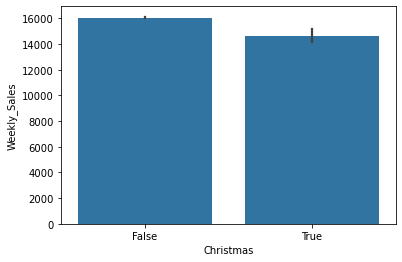

In [27]:
# Feriado de Natal vs não feriado de Natal
# Christmas holiday vs not-Christmas
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) 

<AxesSubplot:xlabel='Thanksgiving', ylabel='Weekly_Sales'>

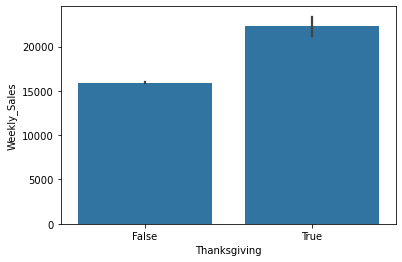

In [28]:
# Feriado de Ações de Graças VS Não feriado de Ações de Graças
# Thanksgiving holiday vs not-thanksgiving
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) 

<AxesSubplot:xlabel='Super_Bowl', ylabel='Weekly_Sales'>

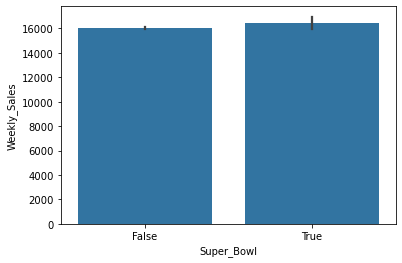

In [29]:
# Feriado Super Bowl VS Não feriado Super Bowl
# Super bowl holiday vs not-super bowl
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) 

<AxesSubplot:xlabel='Labor_Day', ylabel='Weekly_Sales'>

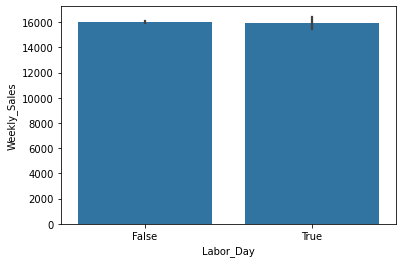

In [30]:
# Feriado Dia do trabalho VS Não Feriado Dia do Trabalho
# Labor day holiday vs not-labor day
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) 

**PT**
É possível ver que, pelos gráficos, o Dia do Trabalho e o Natal não aumentam as vendas médias semanais. Há um efeito positivo nas vendas no Super Bowl, mas a maior diferença está no Dia de Ação de Graças. Podemos inferir que as pessoas geralmente preferem comprar presentes de Natal em um curto período de tempo pré-Natal, então isso pode contribuir para que não se altere as vendas na semana de Natal. Na semana de Ação de Graças há vendas da Black Friday.

**EN**
It is shown that for the graphs, Labor Day and Christmas do not increase weekly average sales. There is positive effect on sales in Super bowl, but the highest difference is in the Thanksgiving. I think, people generally prefer to buy Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week. And, there is Black Friday sales in the Thanksgiving week.

### Analisando os tipos de dados
#### Analyzing data type

**PT**
Podemos ver três tipos diferentes de lojas nos dados: A, B e C.

**EN**
There are three different store types in the data as A, B and C.

In [31]:
# Média de vendas para cada tipo no feriado de Natal 
# Avg weekly sales for types on Christmas 
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()  

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [32]:
# Média de vendas para cada tipo no feriado do Dia do Trabalho
# Avg weekly sales for types on feriado do Dia do Trabalho
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()  

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

In [33]:
# Média de vendas para cada tipo no feriado do Dia de Ações de Graças
# Avg weekly sales for types on Thanksgiving
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()  

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [34]:
# Média de vendas para cada tipo no feriado do Super Bowl
# Avg weekly sales for types on Super Bowl
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()  

Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

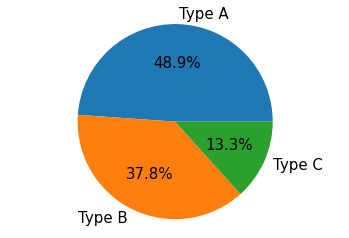

In [35]:
# Plotando o percentual dos tipos de lojas
# Ploting percentages of store types
my_data = [48.88, 37.77 , 13.33 ]  #percentages
my_labels = 'Type A','Type B', 'Type C' # labels
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) #plot pie type and bigger the labels
plt.axis('equal')
mpl.rcParams.update({'font.size': 20}) #bigger percentage labels

É possível ver que metade das lojas percetem ao grupo Tipo A.

It's possible to see that half of the stores are belongs to Type A group.

In [36]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64

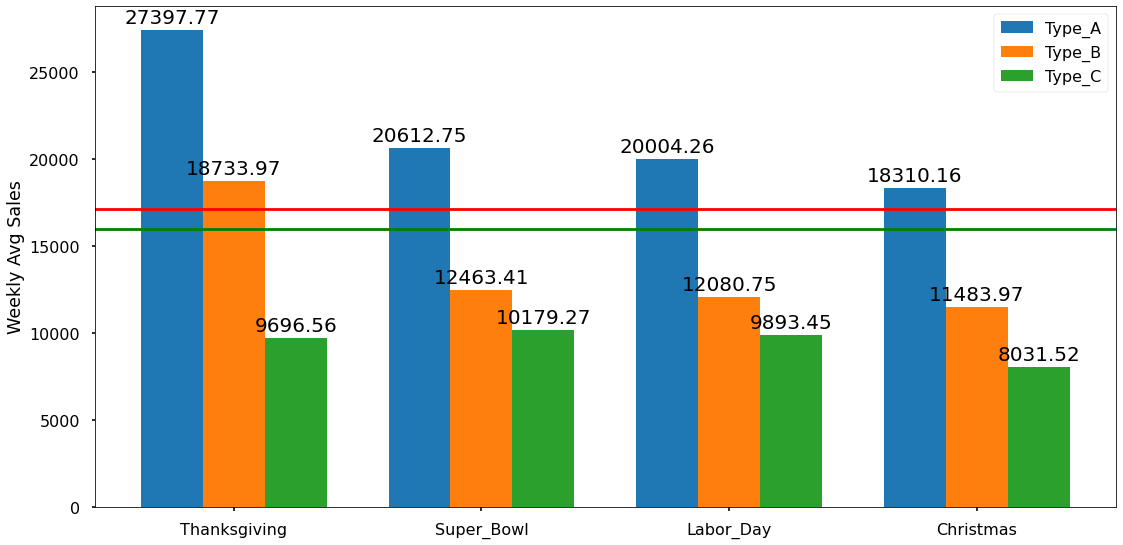

In [37]:
# Plotando média semanal de vendas de acordo com os feriados
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

Observa-se no gráfico que a maior média de vendas ocorre na semana de Ação de Graças, entre os feriados. E, em todos os feriados, as lojas Tipo A têm as vendas mais altas.

It is seen from the graph that, highest sale average is in the Thanksgiving week between holidays. And, for all holidays Type A stores has highest sales.

In [38]:
# Ordenando por vendas semanais
# Order by Weekly Sales
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
90645,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512,False,False,True,False
337053,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,B,103681,False,False,True,False
94393,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,False,False,True,False
333594,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,B,103681,False,False,True,False
131088,14,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,A,200898,False,False,True,False


Além disso, não é surpresa que as 5 maiores vendas semanais pertençam às semanas de Ação de Graças.

Also, it is not surprise that top 5 highest weekly sales are belongs to Thanksgiving weeks.

### Analisando a relação Tamanho e Tipo (Size and Type)
#### Analyzing the Size - Type Relation

In [39]:
# Olhando a relação Size - Type
# See the Size-Type relation
df_store.groupby('Type').describe()['Size'].round(2) 

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


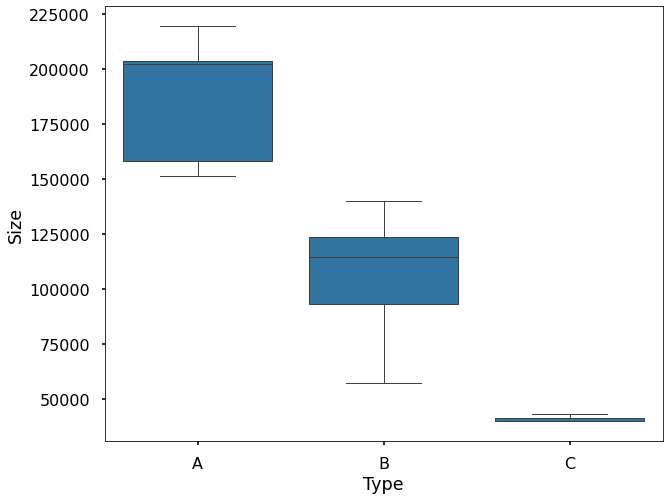

In [40]:
plt.figure(figsize=(10,8)) 
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)

O tamanho do tipo de loja é consistente com as vendas, conforme esperado. Lojas de maior porte apresentam vendas maiores. E o Walmart classifica as lojas de acordo com seus tamanhos conforme gráfico. Após o menor valor de tamanho do Tipo A, o Tipo B começa. Após o menor valor de tamanho do Tipo B, o Tipo C começa.

Size of the type of stores are consistent with sales, as expected. Higher size stores has higher sales. And, Walmart classify stores according to their sizes according to graph. After the smallest size value of Type A, Type B begins. After the smallest size value of Type B, Type C begins.

### Markdown Columns

O Walmart forneceu colunas de remarcações para ver o efeito das remarcações nas vendas. Quando verifico as colunas, há muitos valores NaN para remarcações. Resolvi trocá-los por 0, pois se houver remarcação na linha, ela é mostrada com números. Então, se eu puder escrever 0, isso mostra que não há remarcação naquela data.

Walmart gave markdown columns to see the effect if markdowns on sales. When I check columns, there are many NaN values for markdowns. I decided to change them with 0, because if there is markdown in the row, it is shown with numbres. So, if I can write 0, it shows there is no markdown at that date.

In [41]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
dtype: int64

In [42]:
# Preenchendo nulos com 0
# Filling null's with 0
df = df.fillna(0) 

In [43]:
# Checando valores
# Cheking values
df.isna().sum() 

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

In [44]:
# Analisando algumas estatísticas descritivas
# Analyzing some descriptive statistics
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787
std,12.787236,30.508819,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


O valor mínimo para vendas semanais é 0,01. Muito provavelmente, este valor não é verdadeiro, mas prefiro não alterá-los agora. Porque existem muitos departamentos e muitas lojas. Demora muito tempo para verificar cada departamento de cada loja (45 lojas para 81 departamentos). Então, eu pego médias para EDA.

Minimum value for weekly sales is 0.01. Most probably, this value is not true but I prefer not to change them now. Because, there are many departments and many stores. It takes too much time to check each department for each store (45 store for 81 departments). So, I take averages for EDA.

### Análise profunda nas Vendas
#### Deep analysis in Sales

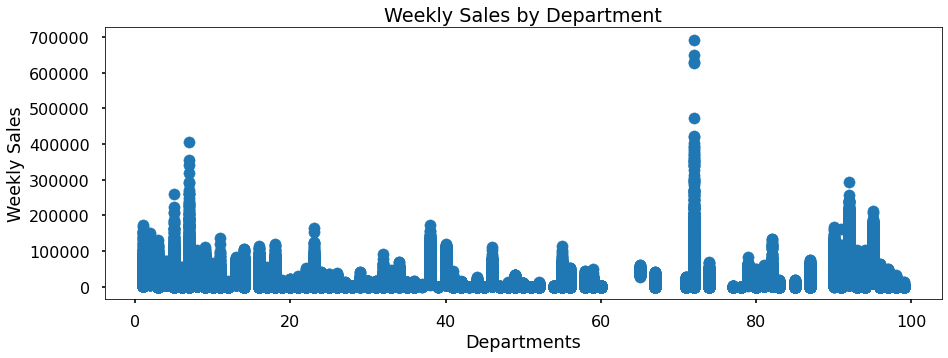

In [45]:
# Gráfico de Vendas mensais por Departamento
# Weekly Sales by Department graphic
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

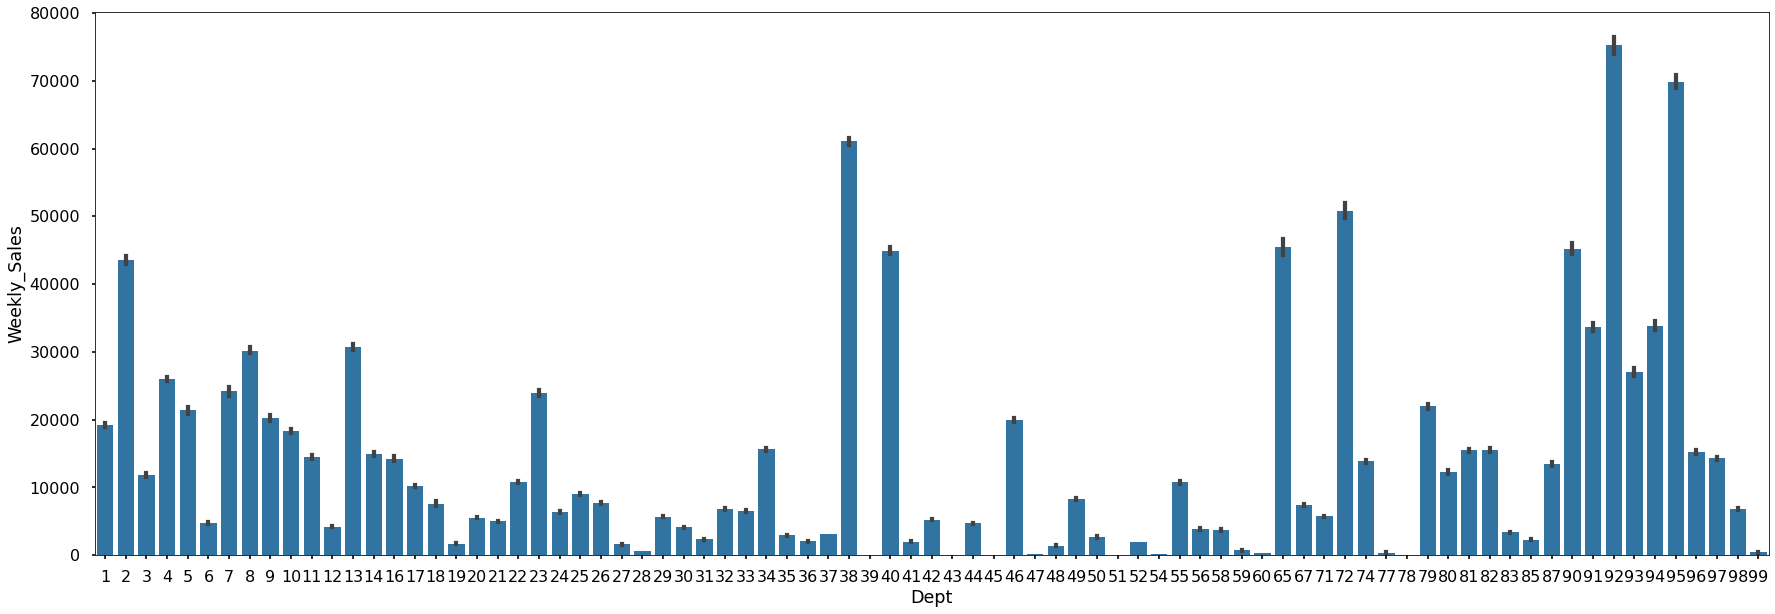

In [46]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)

PT: O departamento 72 apresenta vendas sazonais com picos, mas, em média, o departamento 92 tem as vendas mais altas.

EN: Department 72 has seasonal sales peaks, but on average, department 92 has higher sales.

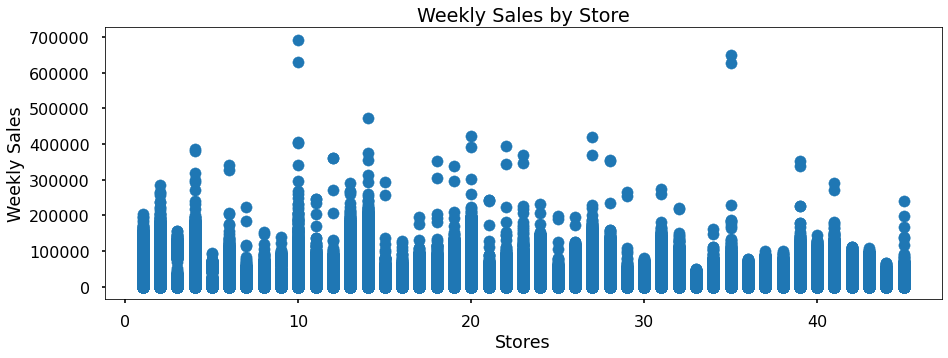

In [47]:
# Vendas semanais por Loja
# Weekly Sales by Store
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

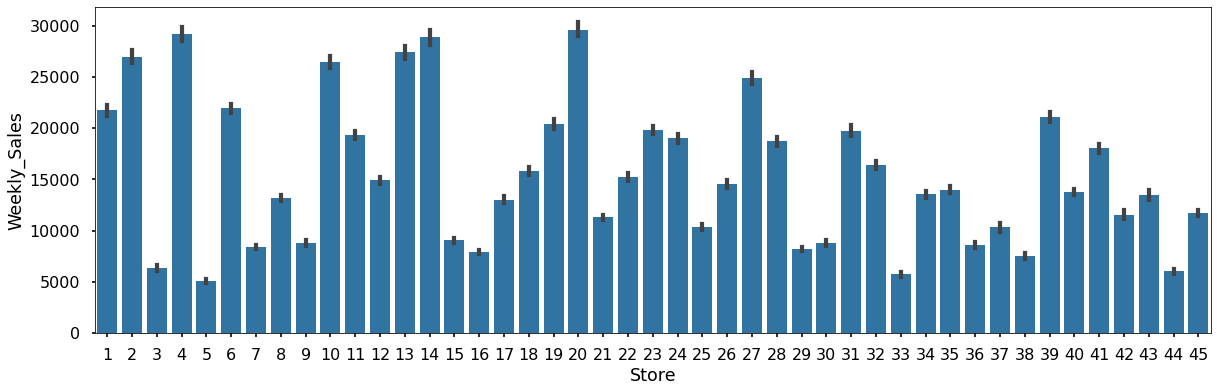

In [48]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

PT: O mesmo ocorre em lojas. A partir do primeiro gráfico, algumas lojas têm vendas mais altas, mas, em média, a loja 20 é a melhor, com as lojas 4 e 14 logo atrás.

EN: The same happens in stores. From the first graph, some stores have higher sales, but on average, store 20 is the best, with stores 4 and 14 following closely.

### Alterando campo de data para 'datetime' e criando novas colunas
#### Changing Date to Datetime and Creating New Columns

In [49]:
df['Date'] = pd.to_datetime(df['Date']) # convert to datetime
df['week'] = df['Date'].dt.isocalendar().week
df['month']= df['Date'].dt.month 
df['year'] = df['Date'].dt.year

In [50]:
df.groupby('month')['Weekly_Sales'].mean() 

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [51]:
# Ver os melhores anos para vendas
# to see the best years for sales
df.groupby('year')['Weekly_Sales'].mean() 

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='month'>

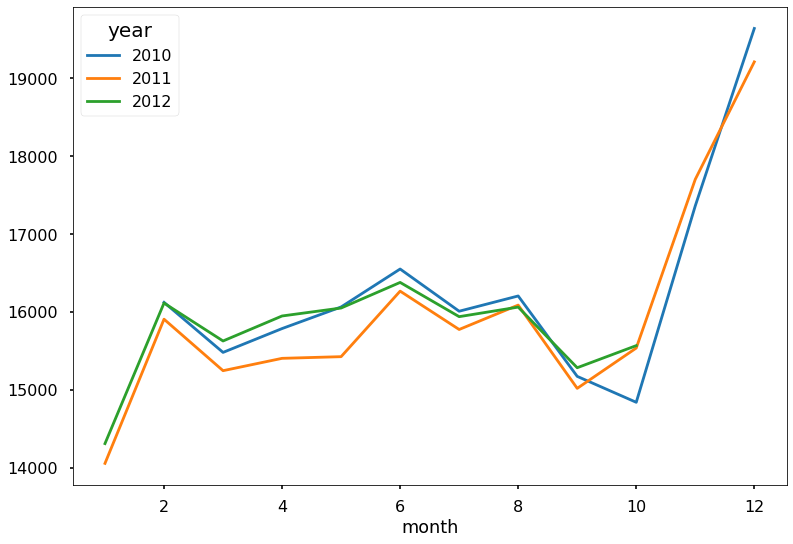

In [52]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

PT: O gráfico mostra que 2011 tem vendas geralmente mais baixas que 2010. Apesar da média de 2010 ser maior, a falta de dados de novembro e dezembro em 2012, meses com vendas elevadas, deixa sua média próxima à de 2010. Provavelmente, 2012 lideraria se obtivermos e adicionarmos os resultados desses meses.

EN: The graph indicates lower sales in 2011 compared to 2010. Despite 2010 having a higher average, the lack of data for November and December in 2012, months with typically higher sales, keeps its average close to that of 2010. It would likely take the lead if we obtain and add the results for those months.

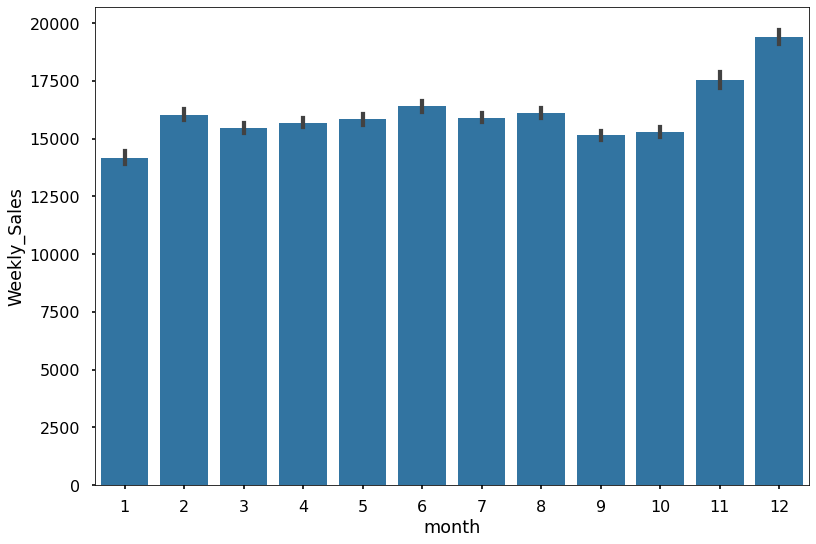

In [53]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)

PT: Ao analisar o gráfico acima, as melhores vendas ocorrem em dezembro e novembro, como esperado. Os valores mais altos são associados ao feriado de Ação de Graças, mas, ao calcular a média, fica claro que dezembro tem o melhor valor.

EN: When we look at the graph above, the best sales are in December and November, as expected. The highest values belong to the Thanksgiving holiday, but when we take the average, it is obvious that December has the best value.

In [54]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

PT: As cinco maiores médias de vendas por semana ocorrem 1-2 semanas antes do Natal, do Dia de Ação de Graças, da Black Friday e no final de maio, quando as escolas estão fechadas.
    
EN: The top 5 sales averages by week occur 1-2 weeks before Christmas, Thanksgiving, Black Friday, and at the end of May when schools are closed.

<AxesSubplot:xlabel='week'>

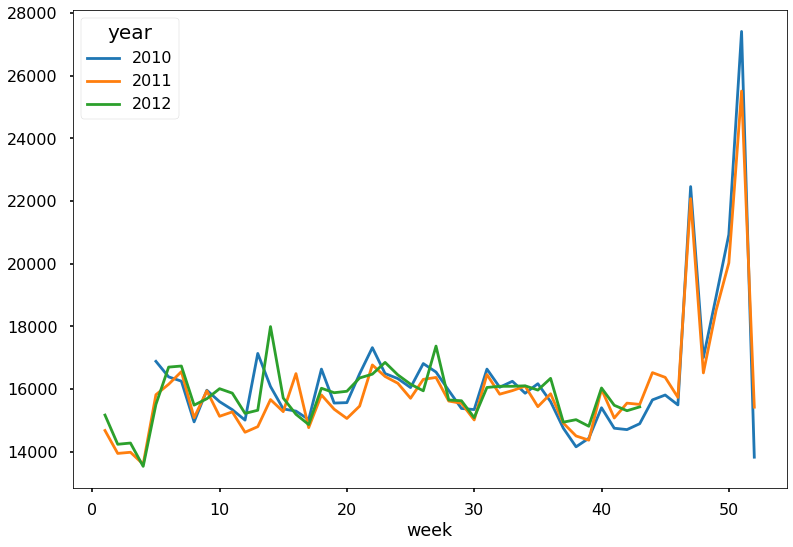

In [55]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

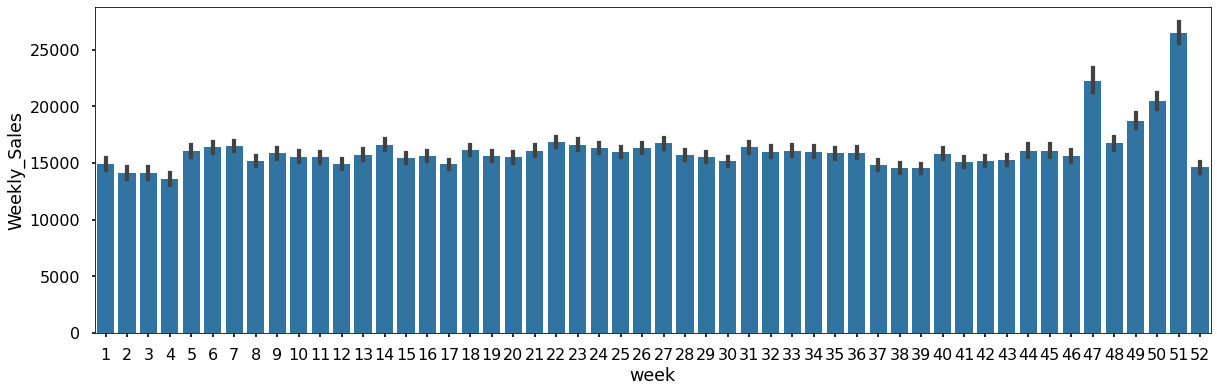

In [56]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)

PT: Pelos gráficos, observa-se que a 51ª semana e a 47ª semana têm médias significativamente mais altas devido aos efeitos do Natal, Ação de Graças e Black Friday.

EN: From the graphs, it is evident that the 51st week and 47th weeks have significantly higher averages due to the effects of Christmas, Thanksgiving, and Black Friday.

### Mais análises: Preço do Combustível, IPC (Índice de Preços ao Consumidor), Desemprego, Efeitos da Temperatura

#### Further analysis: Fuel Price, CPI , Unemployment , Temperature Effects

<AxesSubplot:xlabel='Fuel_Price'>

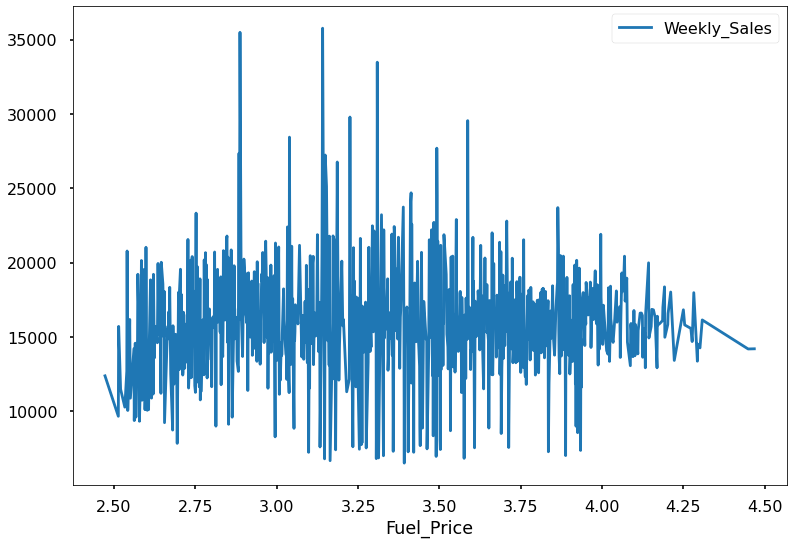

In [57]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<AxesSubplot:xlabel='Temperature'>

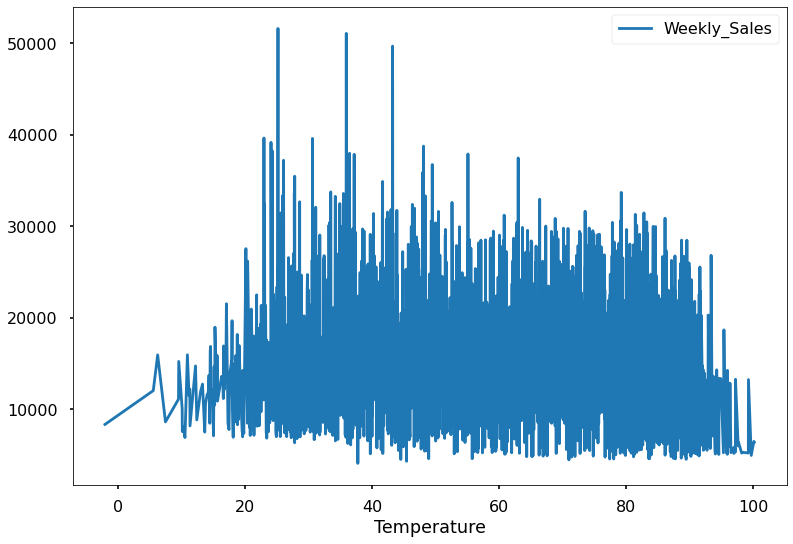

In [58]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<AxesSubplot:xlabel='CPI'>

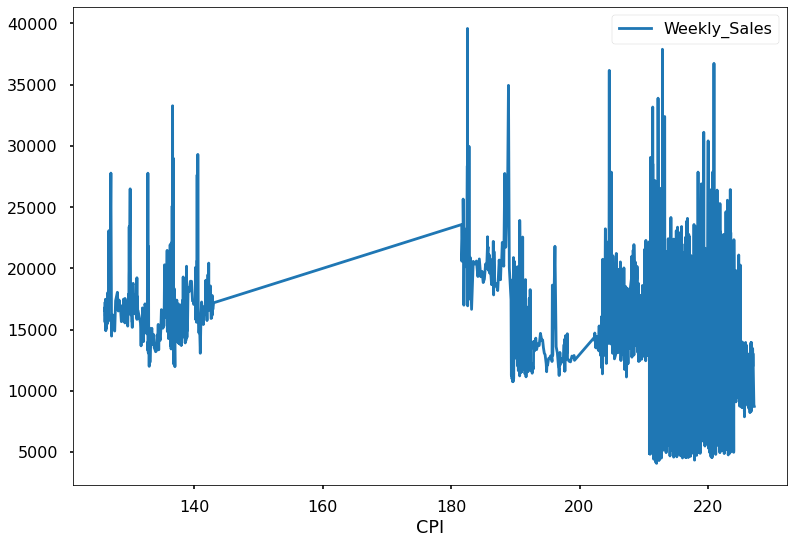

In [59]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<AxesSubplot:xlabel='Unemployment'>

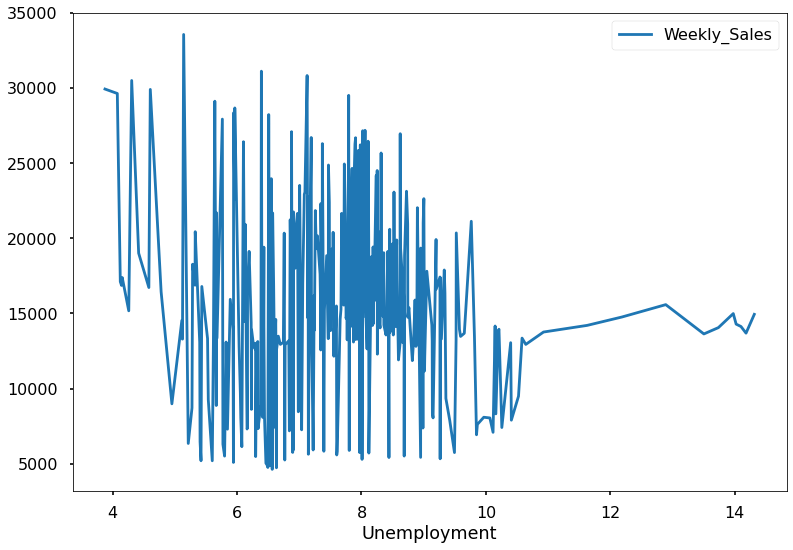

In [60]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

PT: "A partir dos gráficos, observa-se que não há padrões significativos entre IPC, temperatura, taxa de desemprego, preço do combustível em relação às vendas semanais. Não há dados para o IPC entre 140-180 também."

EN: "From the graphs, it is observed that there are no significant patterns between CPI, temperature, unemployment rate, fuel price vs weekly sales. There is no data for CPI between 140-180 as well."

In [61]:
df.to_csv('./clean_data.csv') 

### Achados e análises

#### Findings and Explorations


PT:
* São 45 lojas e 81 departamentos em dados. Os departamentos não são iguais em todas as lojas.
* Embora o departamento 72 tenha valores de vendas semanais mais elevados, em média o departamento 92 é o melhor. Isso nos mostra que alguns departamentos têm valores mais altos como sazonais, como o Dia de Ação de Graças. É consistente quando olhamos para as 5 principais vendas em dados, todas elas pertencentes ao 72º departamento no feriado de Ação de Graças.
* Embora as lojas 10 e 35 tenham por vezes valores de vendas semanais mais elevados, na média geral as lojas 20 e 4 estão no primeiro e segundo lugar. Isso significa que algumas áreas apresentam vendas sazonais mais altas.
* As lojas possuem 3 tipos como A, B e C de acordo com seus tamanhos. Quase metade das lojas são maiores que 150.000 e categorizadas como A. De acordo com o tipo, as vendas das lojas estão mudando.

* Como esperado, as vendas médias nos feriados são superiores às datas normais.

* O feriado de Natal é apresentado como os últimos dias do ano. Mas as pessoas geralmente compram na 51ª semana. Então, quando olhamos as vendas totais dos feriados, o Dia de Ação de Graças tem vendas maiores entre eles que foram atribuídas pelo Walmart.
* O ano de 2010 tem vendas maiores que 2011 e 2012. Porém, as vendas de novembro e dezembro não estão nos dados de 2012. Mesmo sem os meses de vendas mais altos, 2012 não é significativamente menor que 2010, portanto, após somar os últimos dois meses, pode ser o primeiro .
* Obviamente, observa-se que as semanas 51 e 47 apresentam valores mais elevados e as semanas 50-48 os seguem. Curiosamente, o 5º maior número de vendas pertence à 22ª semana do ano. Estes resultados mostram que o Natal, o Dia de Ação de Graças e a Black Friday são muito importantes do que outras semanas para vendas e o 5º momento importante é a 22ª semana do ano e é o final de maio, quando as escolas estão fechadas. Muito provavelmente, as pessoas estão se preparando para as férias no final de maio.
* As vendas de janeiro são significativamente menores que nos outros meses. Este é o resultado das altas vendas de novembro e dezembro. Depois de dois meses de vendas altas, as pessoas preferem pagar menos em janeiro.
* IPC, temperatura, taxa de desemprego e preço do combustível não apresentam padrão nas vendas semanais.

EN:

* There are 45 stores and 81 department in data. Departments are not same in all stores.
* Although department 72 has higher weekly sales values, on average department 92 is the best. It shows us, some departments has higher values as seasonal like Thanksgiving. It is consistant when we look at the top 5 sales in data, all of them belongs to 72th department at Thanksgiving holiday time.
* Although stores 10 and 35 have higher weekly sales values sometimes, in general average store 20 and store 4 are on the first and second rank. It means that some areas has higher seasonal sales.
* Stores has 3 types as A, B and C according to their sizes. Almost half of the stores are bigger than 150000 and categorized as A. According to type, sales of the stores are changing.
* As expected, holiday average sales are higher than normal dates.
* Christmas holiday introduces as the last days of the year. But people generally shop at 51th week. So, when we look at the total sales of holidays, Thankgiving has higher sales between them which was assigned by Walmart.
* Year 2010 has higher sales than 2011 and 2012. But, November and December sales are not in the data for 2012. Even without highest sale months, 2012 is not significantly less than 2010, so after adding last two months, it can be first.
* It is obviously seen that week 51 and 47 have higher values and 50-48 weeks follow them. Interestingly, 5th top sales belongs to 22th week of the year. This results show that Christmas, Thankgiving and Black Friday are very important than other weeks for sales and 5th important time is 22th week of the year and it is end of the May, when schools are closed. Most probably, people are preparing for holiday at the end of the May.
* January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to pay less on January.
* CPI, temperature, unemployment rate and fuel price have no pattern on weekly sales.

### Primeira tentativa com Random Forest
#### First Trial with Random Forest

In [62]:
pd.options.display.max_columns=100 # to see columns 

In [63]:
df = pd.read_csv('./clean_data.csv')

In [64]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [65]:
df['Date'] = pd.to_datetime(df['Date'])

### Pŕe-processamento - Codificando os dados
#### Preprocissing - encoding the data

In [66]:
df_encoded = df.copy()

In [67]:
type_group = {'A':1, 'B': 2, 'C': 3}  
df_encoded['Type'] = df_encoded['Type'].replace(type_group)

In [68]:
df_encoded['Super_Bowl'] = df_encoded['Super_Bowl'].astype(bool).astype(int)

In [69]:
df_encoded['Thanksgiving'] = df_encoded['Thanksgiving'].astype(bool).astype

In [70]:
df_encoded['Labor_Day'] = df_encoded['Labor_Day'].astype(bool).astype(int)

In [71]:
df_encoded['Christmas'] = df_encoded['Christmas'].astype(bool).astype(int) 

In [72]:
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int)

In [73]:
df_new = df_encoded.copy()

###  Observation of Interactions between Features

PT:
Em primeiro lugar, retirarei as colunas de feriados divididas dos meus dados e tentarei sem elas. Para manter meus dados codificados seguros, atribuí meu dataframe a um novo e usarei para isso.

EN:
Firstly, i will drop divided holiday columns from my data and try without them. To keep my encoded data safe, I assigned my dataframe to new one and I will use for this.

In [74]:
drop_col = ['Super_Bowl','Labor_Day','Thanksgiving','Christmas']
df_new.drop(drop_col, axis=1, inplace=True) 

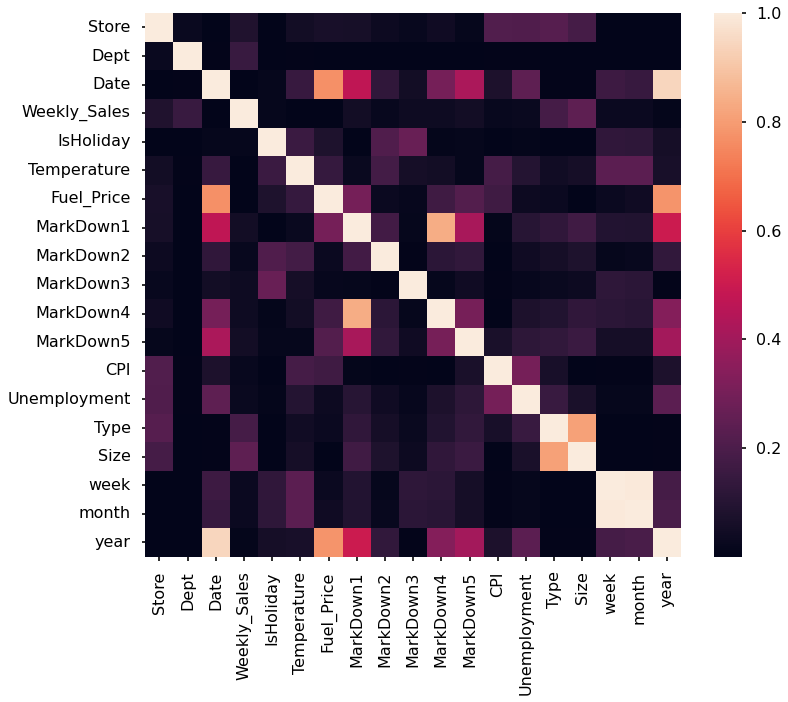

In [75]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())  
plt.show()

PT
Temperatura, desemprego e IPC não têm efeito significativo nas vendas semanais, por isso vou descartá-los. Além disso, Markdown 4 e 5 estão altamente correlacionados com Markdown 1. Portanto, vou abandoná-los também. Pode criar problemas de multicolinearidade, talvez. Então, primeiro vou tentar sem eles.

EN
Temperature, unemployment, CPI have no significant effect on weekly sales, so I will drop them. Also, Markdown 4 and 5 highly correlated with Markdown 1. So, I will drop them also. It can create multicollinearity problem, maybe. So, first I will try without them.

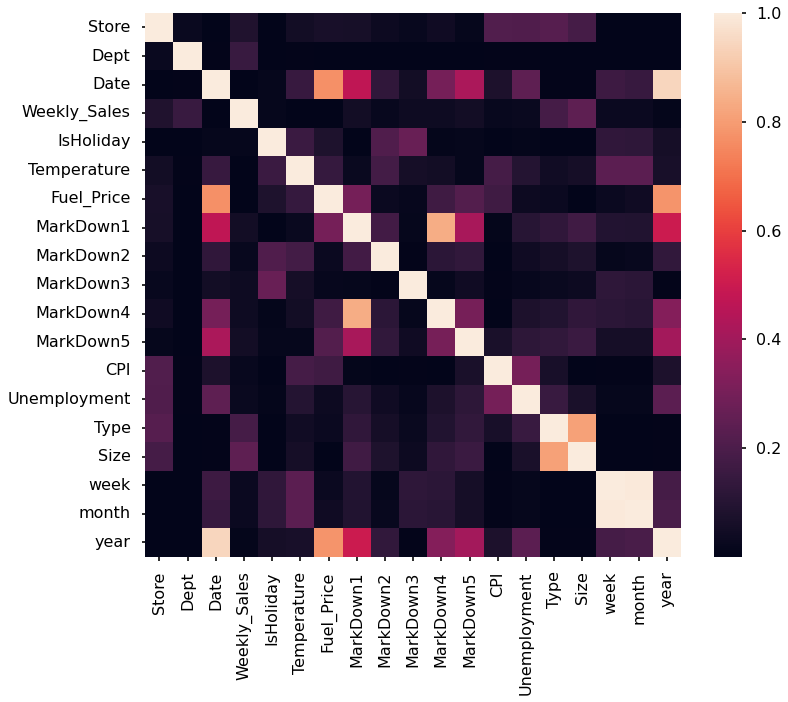

In [76]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs()) 
plt.show()

PT
Tamanho e tipo estão altamente correlacionados com as vendas semanais. Além disso, departamento e loja estão correlacionados com as vendas.

EN 
Size and type are highly correlated with weekly sales. Also, department and store are correlated with sales.

In [77]:
df_new = df_new.sort_values(by='Date', ascending=True)

### Criando base de testes
#### Creating Train-Test Splits

PT
Nossa coluna de data possui valores contínuos, para manter os recursos de data contínuos, não aceitarei divisão aleatória. então, divido os dados manualmente de acordo com 70%.

EN
Our date column has continuos values, to keep the date features continue, I will not take random splitting. so, I split data manually according to 70%.



In [78]:
train_data = df_new[:int(0.7*(len(df_new)))]
test_data = df_new[int(0.7*(len(df_new))):] 

target = "Weekly_Sales"
used_cols = [c for c in df_new.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [79]:
# to keep train and test X values together
X = df_new[used_cols] 

PT
Temos informações suficientes em nossa data, como semana do ano. Então, eu elimino as colunas de data.

EN
We have enough information in our date such as week of the year. So, I drop date columns.

In [80]:
X_train = X_train.drop(['Date'], axis=1) # dropping date from train
X_test = X_test.drop(['Date'], axis=1) # dropping date from test

### Função de definição de métrica
#### Metric Definition Function

PT
Nossa métrica não é calculada como padrão a partir de modelos prontos. Então usarei a função abaixo para calculá-lo.

EN 
Our metric is not calculated as default from ready models. It is weighed error so, I will use function below to calculate it.

In [81]:
def wmae_test(test, pred): # WMAE for test 
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

###  Regressor Floresta Aleatória
#### Random Forest Regressor


PT
Para ajustar o regressor, posso usar gridsearch, mas leva muito tempo para esse tipo de dados que possui muitas linhas e colunas. Então, escolho os parâmetros do regressor manualmente. Alterei os parâmetros todas as vezes e tento encontrar o melhor resultado.

EN
To tune the regressor, I can use gridsearch but it takes too much time for this type of data which has many rows and columns. So, I choose regressor parameters manually. I changed the parameters each time and try to find the best result.

In [82]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()



#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

In [83]:
wmae_test(y_test, y_pred_test)

6424.570966213266

PT
Para a primeira tentativa, meu erro ponderado está em torno de 6424.

EN
For the first trial, my weighted error is around 6424.

### Análise
#### To See Feature Importance

In [84]:
X = X.drop(['Date'], axis=1) #dropping date column from X

Feature ranking:
1. feature 1 (0.741923)
2. feature 13 (0.079194)
3. feature 0 (0.038788)
4. feature 12 (0.037723)
5. feature 10 (0.026315)
6. feature 11 (0.018002)
7. feature 14 (0.015320)
8. feature 3 (0.012397)
9. feature 4 (0.010623)
10. feature 15 (0.006497)
11. feature 7 (0.003957)
12. feature 9 (0.001882)
13. feature 2 (0.001813)
14. feature 8 (0.001705)
15. feature 5 (0.001589)
16. feature 6 (0.001353)
17. feature 16 (0.000919)


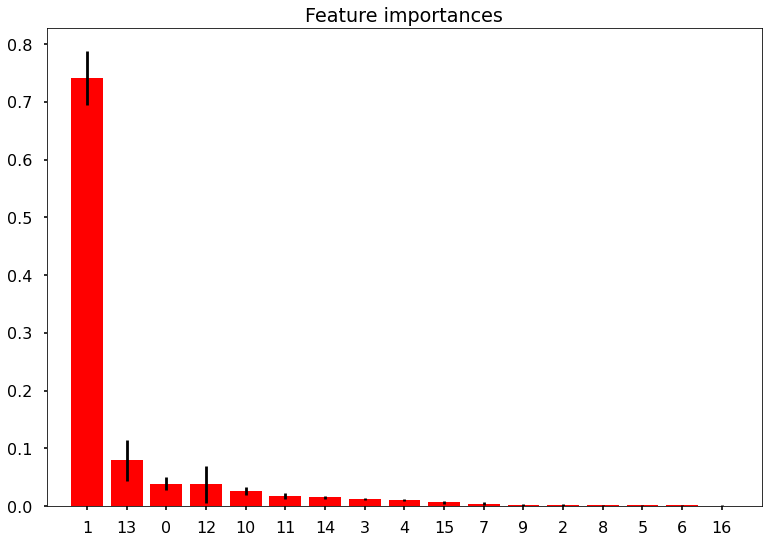

In [85]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

PT
Depois de observar a importância das features, exclui as 3-4 features menos importantes e experimentei o modelo. Encontrei o melhor resultado quando abandonei a coluna do mês, que está altamente correlacionada com a semana.

EN 
After looking feature importance, I dropped least important 3-4 features and tried the model. I found the best result when I dropped month column which is highly correlated with week.

In [86]:
X1_train = X_train.drop(['month'], axis=1) # dropping month
X1_test = X_test.drop(['month'], axis=1)

### Modelo sem Mês
#### Model Again without Month

In [87]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X1_train, y_train)

# predictions on train set
y_pred = pipe.predict(X1_train)

# predictions on test set
y_pred_test = pipe.predict(X1_test)

In [88]:
wmae_test(y_test, y_pred_test)

6032.947602254162

Melhores resultados.

### Modelo com todos os dados

#### Model with Whole Data

PT
Agora, quero ter certeza de que meu modelo aprenderá com as colunas que eliminei ou não. Portanto, aplicarei meu modelo a todos os dados codificados novamente.

EN
Now, I want to make sure that my model will learn from the columns which I dropped or not. So, I will apply my model to whole encoded data again.

In [89]:
# splitting train-test to whole dataset
train_data_enc = df_encoded[:int(0.7*(len(df_encoded)))]
test_data_enc = df_encoded[int(0.7*(len(df_encoded))):]

target = "Weekly_Sales"
used_cols1 = [c for c in df_encoded.columns.to_list() if c not in [target]] # all columns except price

X_train_enc = train_data_enc[used_cols1]
X_test_enc = test_data_enc[used_cols1]
y_train_enc = train_data_enc[target]
y_test_enc = test_data_enc[target]

In [90]:
X_enc = df_encoded[used_cols1] # to get together train,test splits

In [91]:
X_enc = X_enc.drop(['Date'], axis=1) #dropping date column for whole X

In [92]:
X_train_enc = X_train_enc.drop(['Date'], axis=1) # dropping date from train and test
X_test_enc= X_test_enc.drop(['Date'], axis=1)

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assuming X_train_enc has both numerical and categorical features
numeric_features = X_train_enc.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train_enc.select_dtypes(include=['object']).columns

# Create a preprocessor to handle numerical and categorical features separately
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Update the pipeline to include the preprocessor
pipe = make_pipeline(preprocessor, rf)

# Fit the pipeline
pipe.fit(X_train_enc, y_train_enc)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Super_Bowl', 'Labor_Day', 'Christmas',
       'week', 'month', 'year'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Thanksgiving'], dtype='object'))])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=35, max_features='sqrt',
                                       min_samples_split=10, n_estimators=50,
                                       n_jobs=-1, random_state=42))])

In [94]:
# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc)

# Calculate WMAE on the test set
wmae_test_result = wmae_test(y_test_enc, y_pred_test_enc)

### Importância das features para todo o dataset codificado
#### Feature Importance for Whole Encoded Dataset

Feature ranking:
1. feature 1 (0.735413)
2. feature 13 (0.087729)
3. feature 12 (0.036943)
4. feature 0 (0.031696)
5. feature 10 (0.029109)
6. feature 11 (0.016671)
7. feature 17 (0.012573)
8. feature 3 (0.011824)
9. feature 4 (0.010197)
10. feature 18 (0.005999)
11. feature 7 (0.004567)
12. feature 5 (0.003870)
13. feature 9 (0.003582)
14. feature 8 (0.003420)
15. feature 6 (0.002541)
16. feature 2 (0.001343)
17. feature 19 (0.001313)
18. feature 16 (0.000627)
19. feature 14 (0.000299)
20. feature 15 (0.000283)
21. feature 20 (0.000000)


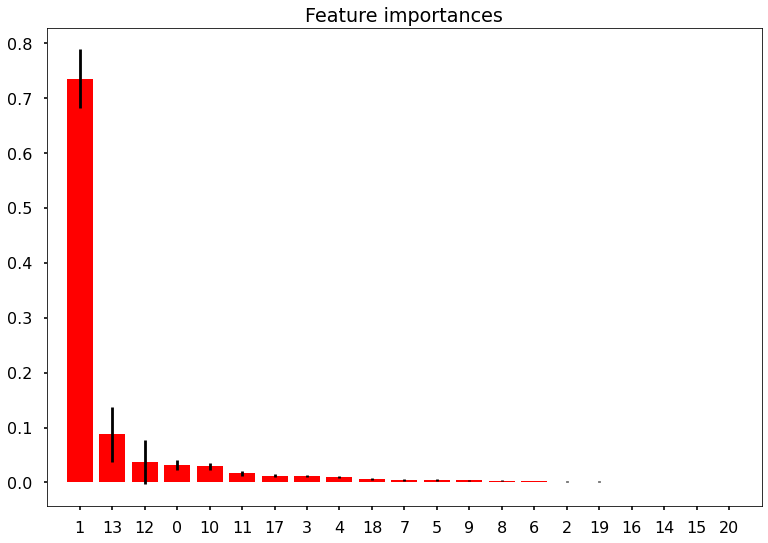

In [95]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking
print("Feature ranking:")

for f in range(X_enc.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_enc.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_enc.shape[1]), indices)
plt.xlim([-1, X_enc.shape[1]])
plt.show()

PT
De acordo com a importância da feature, eliminei algumas colunas de todo o conjunto e tentei meu modelo novamente.

EN 
According to feature importance, I dropped some columns from whole set and try my model again.

In [96]:
df_encoded_new = df_encoded.copy() # taking copy of encoded data to keep it without change.
df_encoded_new.drop(drop_col, axis=1, inplace=True)

### Modelo de acordo com a importância da Feature
#### Model According to Feature Importance

In [97]:
#train-test splitting
train_data_enc_new = df_encoded_new[:int(0.7*(len(df_encoded_new)))]
test_data_enc_new = df_encoded_new[int(0.7*(len(df_encoded_new))):]

target = "Weekly_Sales"
used_cols2 = [c for c in df_encoded_new.columns.to_list() if c not in [target]] # all columns except price

X_train_enc1 = train_data_enc_new[used_cols2]
X_test_enc1 = test_data_enc_new[used_cols2]
y_train_enc1 = train_data_enc_new[target]
y_test_enc1 = test_data_enc_new[target]

#droping date from train-test
X_train_enc1 = X_train_enc1.drop(['Date'], axis=1)
X_test_enc1= X_test_enc1.drop(['Date'], axis=1)

In [98]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=40,
                           max_features = 'log2',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc1, y_train_enc1)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc1)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc1)

In [99]:
pipe.score(X_test_enc1,y_test_enc1)

0.6629917715101941

In [100]:
wmae_test(y_test_enc1, y_pred_test_enc)

2363.454571180467

PT
Encontrei melhores resultados ao fazer a seleção de recursos de todo o conjunto de dados codificados.

EN
I found best results with doing feature selection from whole encoded dataset.

### Modelo sem a coluna Mês
#### Model with Dropping Month Column

PT 
Com o mesmo conjunto de datas anterior, tento modelar novamente sem a coluna do mês.

EN 
With the same dateset before, I try to model again without month column.

In [101]:
df_encoded_new1 = df_encoded.copy()
df_encoded_new1.drop(drop_col, axis=1, inplace=True)

In [102]:
df_encoded_new1 = df_encoded_new1.drop(['Date'], axis=1)

In [103]:
df_encoded_new1 = df_encoded_new1.drop(['month'], axis=1)

In [104]:
#train-test split
train_data_enc_new1 = df_encoded_new1[:int(0.7*(len(df_encoded_new1)))]
test_data_enc_new1 = df_encoded_new1[int(0.7*(len(df_encoded_new1))):]

target = "Weekly_Sales"
used_cols3 = [c for c in df_encoded_new1.columns.to_list() if c not in [target]] # all columns except price

X_train_enc2 = train_data_enc_new1[used_cols3]
X_test_enc2 = test_data_enc_new1[used_cols3]
y_train_enc2 = train_data_enc_new1[target]
y_test_enc2 = test_data_enc_new1[target]

In [105]:
#modeling part
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc2, y_train_enc2)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc2)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc2)

In [106]:
pipe.score(X_test_enc2,y_test_enc2)

0.67858469448283

In [107]:
wmae_test(y_test_enc2, y_pred_test_enc)

2293.352006087676

PT
Não houve melhores resultados.

EN
It did not give better results than before.

In [112]:
df_results = pd.DataFrame(columns=["Model", "Info", 'WMAE'])

In [114]:
result1 = pd.DataFrame({
    "Model": ['RandomForestRegressor'],
    "Info": ['w/out divided holiday columns'],
    'WMAE': [5850]
})

result2 = pd.DataFrame({
    "Model": ['RandomForestRegressor'],
    "Info": ['w/out month column'],
    'WMAE': [5494]
})

result3 = pd.DataFrame({
    "Model": ['RandomForestRegressor'],
    "Info": ['whole data'],
    'WMAE': [2450]
})

result4 = pd.DataFrame({
    "Model": ['RandomForestRegressor'],
    "Info": ['whole data with feature selection'],
    'WMAE': [1801]
})

result5 = pd.DataFrame({
    "Model": ['RandomForestRegressor'],
    "Info": ['whole data with feature selection w/out month'],
    'WMAE': [2093]
})

# Concatenate the DataFrames
df_results = pd.concat([df_results, result1, result2, result3, result4, result5], ignore_index=True)

In [116]:
df_results

,Model,Info,WMAE
0,RandomForestRegressor,w/out divided holiday columns,5850
1,RandomForestRegressor,w/out month column,5494
2,RandomForestRegressor,whole data,2450
3,RandomForestRegressor,whole data with feature selection,1801
4,RandomForestRegressor,whole data with feature selection w/out month,2093


PT
Os melhores resultados pertencem a todo o conjunto de dados com seleção de recursos. Agora, tentarei modelos de séries temporais.

EN
The best results belongs to whole data set with feature selection. Now, I will try time series models.

### Modelo de séries temporais

####  Time Series Models

In [117]:
df.head() # to see my data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


In [118]:
df["Date"] = pd.to_datetime(df["Date"]) #changing data to datetime for decomposing

In [ ]:
df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')


In [119]:
df.set_index('Date', inplace=True) #seting date as index

### Plotting Sales
#### Plotando vendas

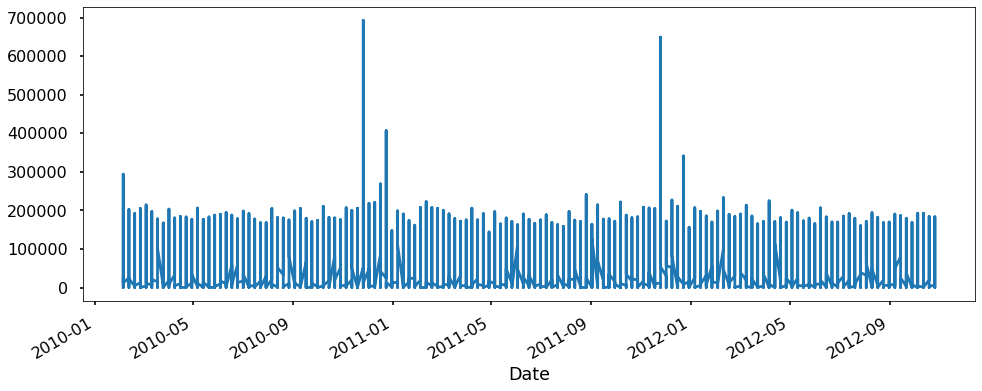

In [120]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

PT
Nesses dados, há muitos datos repetidos. Logo, os agruparei por semana.

EN
In this data, there are lots of same data values. So, I will collect them together as weekly.

In [129]:
df['Type'] = pd.to_numeric(df['Type'], errors='coerce')

In [130]:
df_week = df.groupby(pd.Grouper(freq='W')).mean()

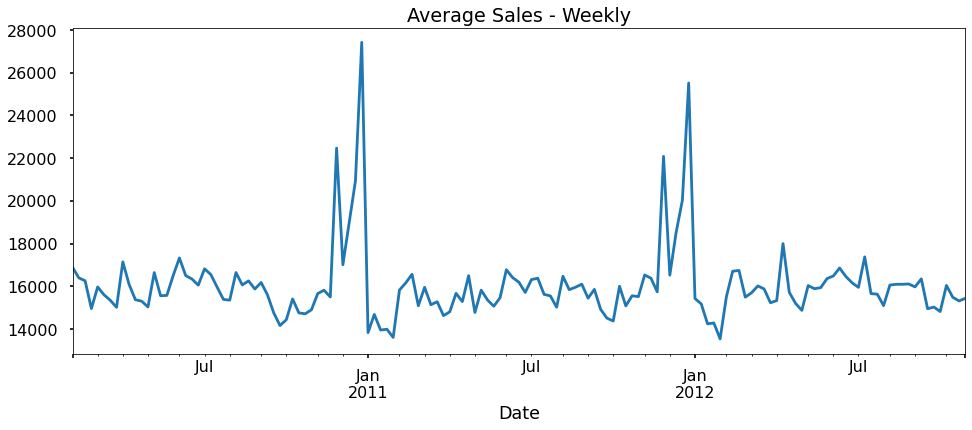

In [131]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

PT
Com a coleta de dados semanalmente, posso ver claramente as vendas médias. Para ver o padrão mensal, reamostrei meus dados também para mensalmente.

EN
With the collecting data as weekly, I can see average sales clearly. To see monthly pattern , I resampled my data to monthly also.

In [132]:
df_month = df.resample('MS').mean() # resampling as monthly

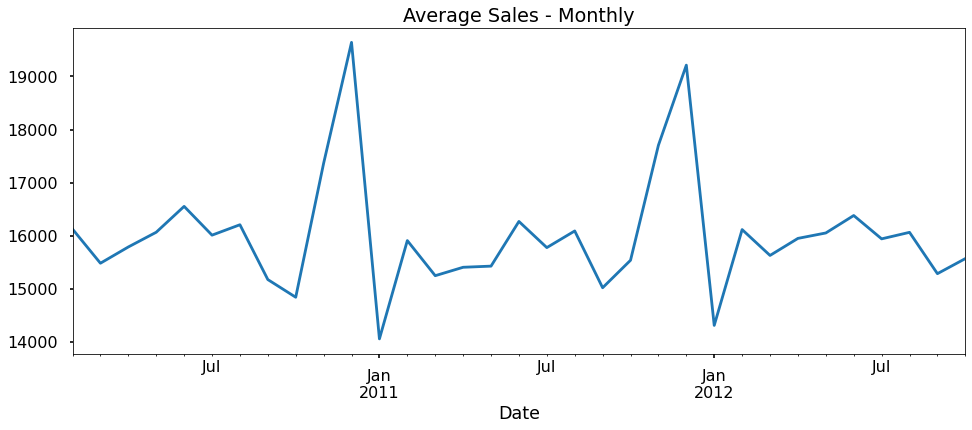

In [133]:
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

PT
Quando mudei os dados para mensais, percebi que perdi alguns padrões nos dados semanais. Portanto, continuarei com dados reamostrados semanalmente.
EN
When I turned data to monthly, I realized that I lost some patterns in weekly data. So, I will continue with weekly resampled data.

### Observar a média e desvio padrão 2 semanas

#### To Observe 2-weeks Rolling Mean and Std

PT
Meus dados não são estacionários. Então, tentarei encontrar uma versão mais estacionária nele.

EN
My data is non-stationary. So, I will try to find more stationary version on it.

In [134]:
# finding 2-weeks rolling mean and std
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

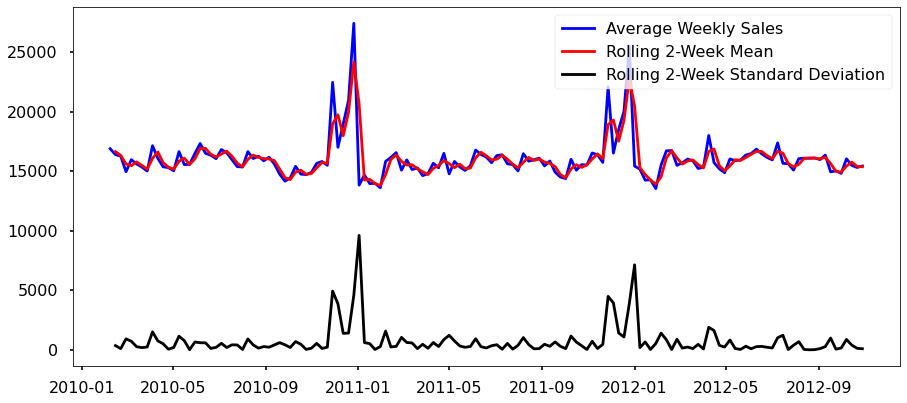

In [135]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

### Teste Adfuller para ter certeza
#### Adfuller Test to Make Sure

In [137]:
from statsmodels.tsa.stattools import adfuller

adfuller(df_week['Weekly_Sales'])

(-5.927107223737572,
 2.4290492082042356e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 2261.596421168073)

PT
A partir do teste e das minhas observações, meus dados não são estacionários. Então, tentarei encontrar uma versão mais estacionária dele.

EN
From test and my observations my data is not stationary. So, I will try to find more stationary version of it.

### Treino - divisão de testes em dados mensais
#### Train - Test Split of Weekly Data

PT
Para fazer divisões de teste de trem continuamente, eu as divido manualmente, não aleatoriamente.

EN
To take train-test splits continuosly, I split them manually, not random.

In [138]:
train_data = df_week[:int(0.7*(len(df_week)))] 
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 22)
Test: (43, 22)


In [139]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] # all columns except price

# assigning train-test X-y values

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

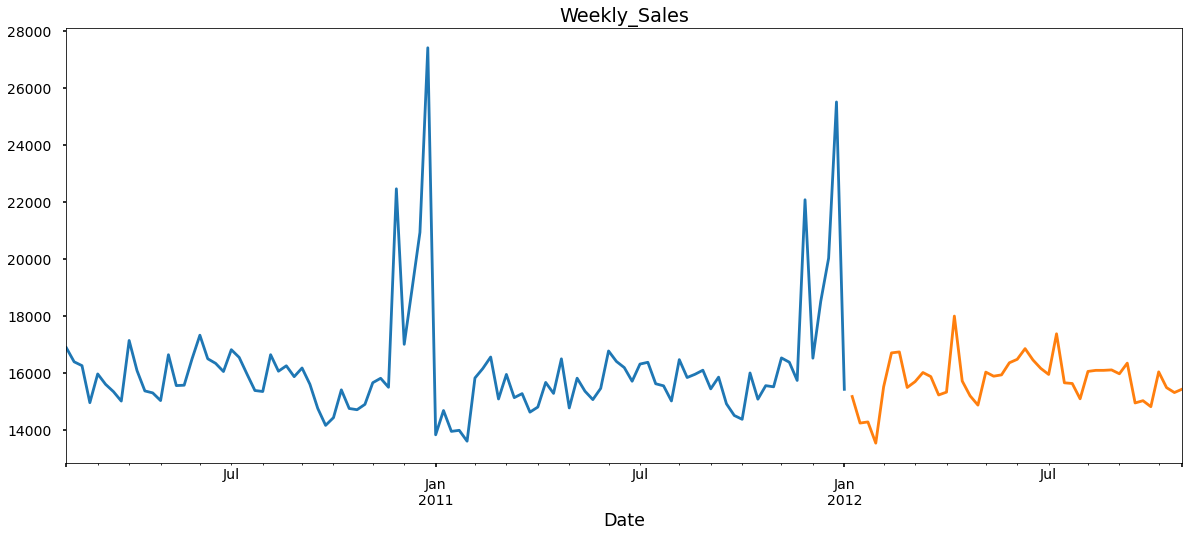

In [140]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

PT
A linha azul representa os dados do meu trem, a amarela representa os dados do teste.

EN
Blue line represents my train data, yellow is test data.

### Decompondo os dados semanalmente para observar a sazonalidade

#### Decomposing Weekly Data to Observe Seasonality

In [145]:
from pmdarima.arima import decompose
from pmdarima.utils import decomposed_plot

decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20) #decomposing of weekly data 

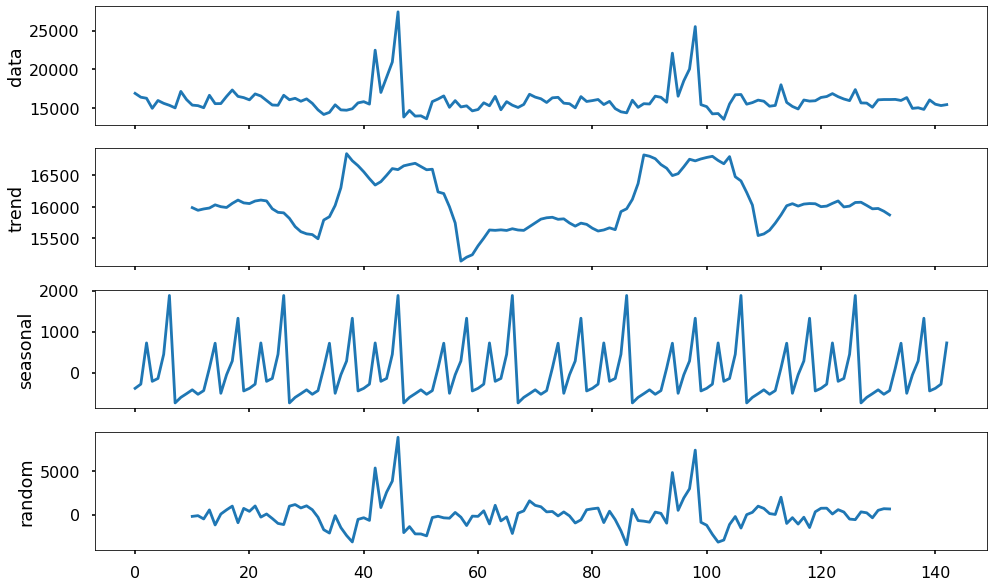

In [146]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

PT
Nos gráficos acima, cada sazonalidade de 20 etapas converge para o ponto inicial. Isso me ajuda a ajustar meu modelo.

EN
From the graphs above, every 20 step seasonality converges to beginning point. This helps me to tune my model.

### Tentando tornar os dados mais estaciónarios

#### Trying To Make Data More Stationary

PT
Agora, tentarei tornar meus dados mais estacionários. Para fazer isso, tentarei um modelo com dados diferenciados, registrados e deslocados.

EN
Now, I will try to make my data more stationary. To do this, I will try model with differenced, logged and shifted data.

### 1. Diferença
#### 1. Difference

In [147]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna() #creating difference values

In [148]:
# taking mean and std of differenced data
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

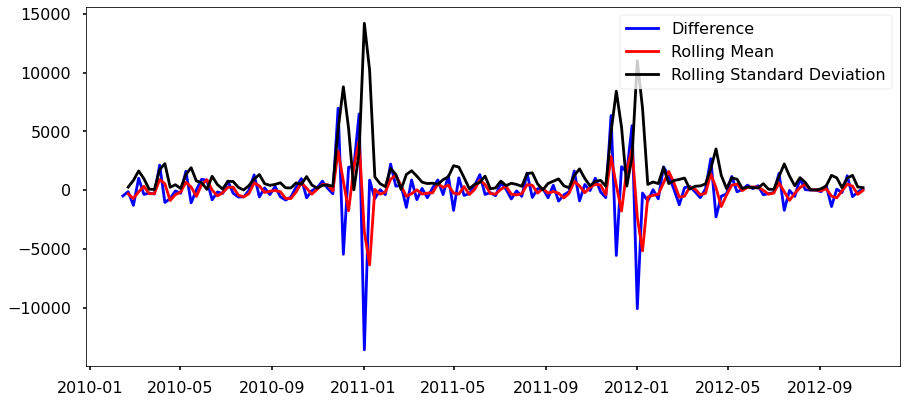

In [149]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

#### 2.Shift

In [150]:
df_week_lag = df_week['Weekly_Sales'].shift().dropna() #shifting the data 

In [151]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean() 
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

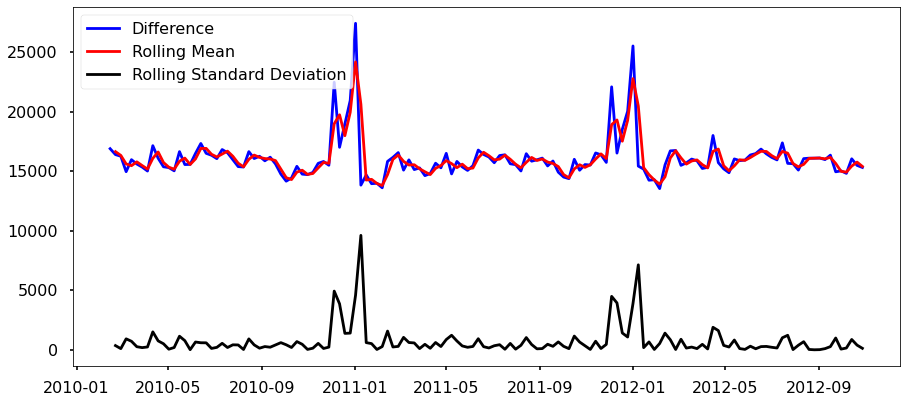

In [152]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

#### 3.Log

In [153]:
logged_week = np.log1p(df_week['Weekly_Sales']).dropna() #taking log of data

In [154]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

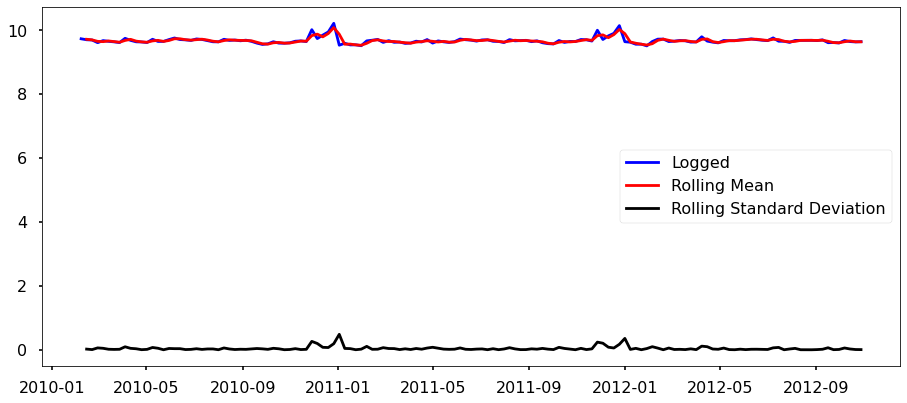

In [155]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

### Auto-ARIMA MODEL
#### Modelo auto-arima

PT
Tentei meus dados sem nenhuma alteração, depois tentei com deslocamento, obtendo log e versão de diferença dos dados. Dados diferenciados deram melhores resultados. Então, resolvi pegar a diferença e usar esses dados.

EN
I tried my data without any changes, then tried with shifting, taking log and difference version of data. Differenced data gave best results. So, I decided to take difference and use this data.

### Dividindo em treino e teste
#### Train-Test Split

In [156]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [158]:
from pmdarima import auto_arima

# train_data = train_data['Weekly_Sales']
# test_data = test_data['Weekly_Sales']

model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1826.858, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1793.619, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1795.532, Time=0.15 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1804.051, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1794.966, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1801.215, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=1791.045, Tim

ARIMA(maxiter=200, order=(3, 0, 2), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

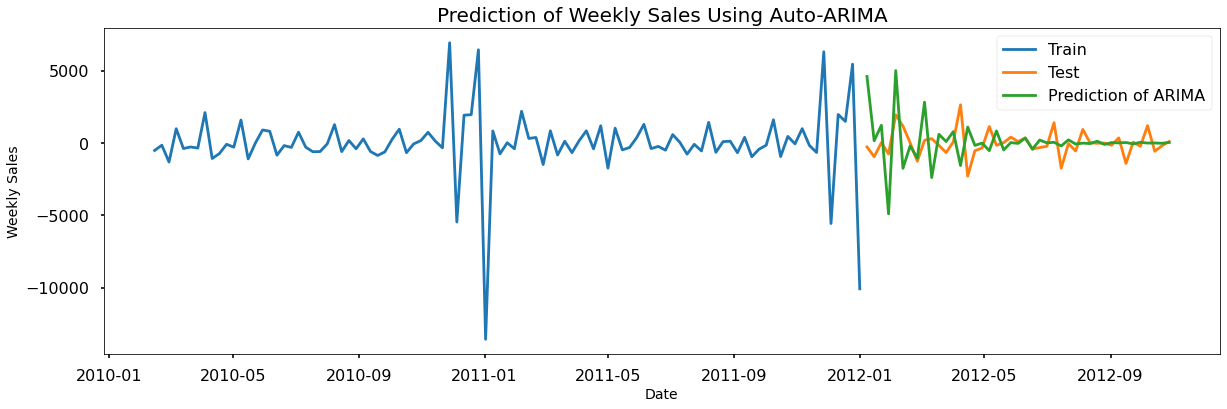

In [159]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

PT
Não gosto do padrão de previsões, então decidi tentar outro modelo.

EN
I do not like the pattern of predictions so I decided to try another model.

### ExponentialSmoothing
#### Suavização Exponencial

PT
Verifiquei modelos Holt-Winters adequados de acordo com meus dados. A suavização exponencial é usada quando os dados têm tendência e nivelam a tendência. O método de tendência amortecida adiciona um parâmetro de amortecimento para que a tendência convirja para um valor constante no futuro.

Meus dados de diferença têm alguns valores negativos e zero, então usei sazonal aditivo e tendência em vez de multiplicativo. Os períodos sazonais são escolhidos a partir dos gráficos decompostos acima. Para ajustar o modelo com iterações demora muito, então mudei e experimentei o modelo para diferentes parâmetros e encontrei os melhores parâmetros e ajustei-os ao modelo.

EN
I checked suitable Holt-Winters models according tp my data. Exponential Smooting are used when data has trend, and it flattens the trend. The damped trend method adds a damping parameter so, the trend converges to a constant value in the future.

My difference data has some minus and zero values, so I used additive seasonal and trend instead of multiplicative. Seasonal periods are chosen from the decomposed graphs above. For tuning the model with iterations take too much time so, I changed and tried model for different parameters and found the best parameters and fitted them to model.

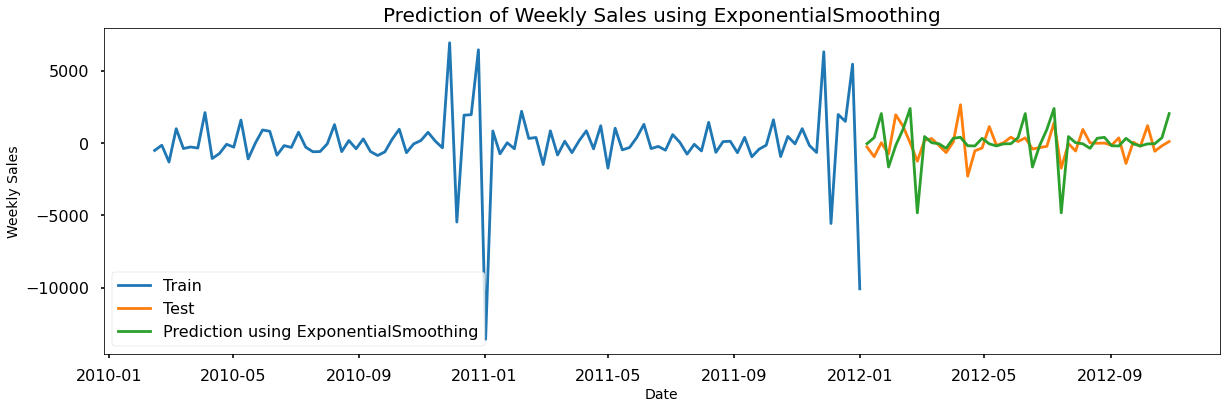

In [162]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.

y_pred = model_holt_winters.forecast(len(test_data_diff))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [163]:
wmae_test(test_data_diff, y_pred)

840.681060966696

PT
No final, encontrei os melhores resultados para meus dados com o Modelo de Suavização Exponencial.

Meu melhor resultado para este projeto é 821. De acordo com os valores de vendas, esse valor está em torno de 4-5% de erro. Se pudermos pegar nossas vendas médias e calcular a porcentagem de 821 erros, isso dá aproximadamente 4-5%.

EN
At the end, I found best results for my data with Exponential Smoothing Model.

My best result for this project is 821. According to sales amounts this value is roughly around 4-5% error. If we can take our average sales and take percentage of 821 errors, it gives 4-5% roughly.